In [1]:
# Scikit-learn version 0.24.2
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)

In [3]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [4]:
cross_val_score(knn_clf, X_tr, y_tr, cv=3, scoring ="accuracy")

array([0.97195, 0.9737 , 0.97035])

In [5]:
y_tr_pred = cross_val_predict(knn_clf, X_tr, y_tr, cv=3)

In [6]:
y_tr_pred_acc = knn_clf.predict(X_ts)
accuracy_score(y_ts, y_tr_pred_acc)

0.9729

In [7]:
target_names = ["class 0", "class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7", "class 8", "class 9"]
print(classification_report(y_tr, y_tr_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99      5920
     class 1       0.96      0.99      0.98      6725
     class 2       0.99      0.96      0.98      6023
     class 3       0.97      0.97      0.97      6107
     class 4       0.98      0.97      0.97      5918
     class 5       0.97      0.96      0.96      5376
     class 6       0.98      0.99      0.98      5915
     class 7       0.97      0.97      0.97      6238
     class 8       0.99      0.94      0.96      5856
     class 9       0.95      0.96      0.96      5922

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [14]:
confusion_matrix(y_tr, y_tr_pred)

array([[5879,    6,    2,    1,    1,    6,   19,    2,    0,    4],
       [   1, 6689,   11,    1,    3,    1,    3,   13,    1,    2],
       [  39,   43, 5810,   22,    5,    2,    5,   76,   14,    7],
       [   3,   13,   24, 5903,    1,   66,    3,   37,   36,   21],
       [   3,   45,    1,    1, 5724,    0,   18,   14,    2,  110],
       [  18,    4,    1,   54,    9, 5178,   57,    5,   15,   35],
       [  22,   13,    1,    0,    4,   16, 5857,    0,    2,    0],
       [   2,   58,   13,    2,   14,    1,    0, 6079,    3,   66],
       [  20,   64,   14,   72,   22,   75,   23,   10, 5494,   62],
       [  16,   17,    7,   26,   62,   15,    2,   61,    9, 5707]],
      dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

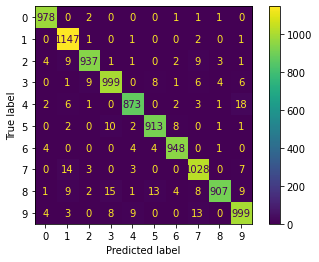

In [8]:
plot_confusion_matrix(knn_clf, X_ts, y_ts)
plt.show

In [9]:
cm = confusion_matrix(y_tr, y_tr_pred)
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

<function matplotlib.pyplot.show(close=None, block=None)>

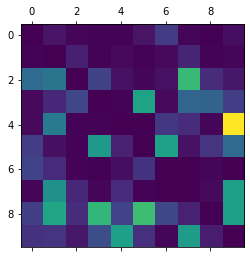

In [10]:
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap=plt.cm.viridis)
plt.show